This week:
- First look at Scikit-Learn
- First look at binary classification   

In [1]:
## Importing Libraries ##

# Data manipulation
import pandas as pd
import numpy as np

# Visualisation
import seaborn as sns
import matplotlib as plt

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

## Reading the data (fetched from kaggle.com via Kaggle CLI) ##

df = pd.read_csv('telco-customer-churn\WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Previewing data frame (.T to examine series in full)
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [2]:
# Preprocessing the data
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Obtaining categorical series
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

# Cleaning categorical data entries
for i in categorical_columns:
    df[i] = df[i].str.lower().str.replace(' ', '_')

# Checking results
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


Things to note:
- `seniorcitizen` is Boolean integer instead of 'True' or 'False' 
- `totalcharges` is categorical instead of numerical
- Need to convert `churn` 'yes' and 'no' to '1' and '0', respectively

In [4]:
# Converting 'totalcharges' to numeric-type
# 'errors' adresses entries which can't be converted to numeric-type
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

# Replacing NAs with 0
df.totalcharges = df.totalcharges.fillna(0)

In [5]:
# Converting churn to binary
df.churn = (df.churn == 'yes').astype(int)
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

In [6]:
# Establishing validation framework
train_val, test = train_test_split(df, test_size=0.2, random_state=1)
train, val = train_test_split(train_val, test_size=0.2/(1-0.2), random_state=1)

# Feature matrices
train = train.reset_index(drop=True)
val   = val.reset_index(drop=True)
test  = test.reset_index(drop=True)

# Target vectors
y_train = train.churn.values
y_val   = val.churn.values
y_test  = test.churn.values

# Removing target vectors from feature matrices
del train['churn']
del val['churn']
del test['churn']

len(train), len(val), len(test)

(4225, 1409, 1409)

Exploratory Data Analysis

In [7]:
# Examining churn data for train_val dataset
train_val = train_val.reset_index(drop=True)
train_val.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

Number of churn users is roughly ~40% of total users.

In [8]:
# Adding 'normalize=True', get the churn rate of users
train_val.churn.value_counts(normalize=True)[:]

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [9]:
# Similarly, can compute the mean for churn rate
train_val.churn.mean()

0.26996805111821087

Three numerical variables:
- `tenure`
- `monthlycharges`
- `totalcharges`

The rest are categorical

In [10]:
# Creating array of numerical series
numeric_type = ['tenure', 'monthlycharges', 'totalcharges']

In [11]:
# Creating array of catergorical series
categorical_type = []

for i in df.columns:
    if i not in numeric_type and i != 'customerid' and i != 'churn':
        categorical_type.append(i)

# Checking no series have been left out
len(df.columns), len(categorical_type), len(numeric_type)

(21, 16, 3)

In [12]:
train_val[categorical_type].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

**Churn rate**

Some features may have more of an affect on churn rate than others (i.e. the gender of a user is less influential than whether or not they have a partner)

In [13]:
train_val[train_val.gender == 'female'].churn.mean()

0.27682403433476394

**Difference** = 'Global Churn Rate' - 'Group Churn Rate'

Interested primarily in magnitude

**Risk Ratio** = 'Group Churn Rate' / 'Global Churn Rate'

Greater than 1 : More likely to Churn <br>
Less than 1 : Less likely to Churn

In [14]:
# Importing tool to iteratively display data in for loop
from IPython.display import display

In [15]:
# Calculating churn statistics for each series
for i in train_val[categorical_type]:
    train_val_group = train_val.groupby(i).churn.agg(['mean', 'count'])
    train_val_group['diff'] = train_val_group['mean'] - train_val.churn.mean()
    train_val_group['risk'] = train_val_group['mean'] / train_val.churn.mean()
    display(train_val_group)
    print()

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


### Mutual Information - Quantifying Importance for Categorical Variables

Want one value to quantify the importance of each variable (mutual information from information theory) so we can compare them

In [16]:
# Calculating mutual information score between categories and churn
print("{0:20} {1:<20}".format("Category", "Score"))
print("{0:20} {1:<20}".format("----", "----"))
for i in categorical_type:
    print("{0:20} {1:<20}".format(i, round(mutual_info_score(train_val[i], train_val.churn),5)))

Category             Score               
----                 ----                
gender               0.00012             
seniorcitizen        0.00941             
partner              0.00997             
dependents           0.01235             
phoneservice         0.00023             
multiplelines        0.00086             
internetservice      0.05587             
onlinesecurity       0.06309             
onlinebackup         0.04692             
deviceprotection     0.04345             
techsupport          0.06103             
streamingtv          0.03185             
streamingmovies      0.03158             
contract             0.09832             
paperlessbilling     0.01759             
paymentmethod        0.04321             


In [17]:
# .apply() takes one input argument so we create a function to input series and .churn
def mutual_info_churn_score(series):
    return mutual_info_score(series, train_val.churn)

In [18]:
# ' ' ' (alternative way)
print("{0:19} {1:}".format("Category", "Score"))
mi = train_val[categorical_type].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

Category            Score


contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

Variables with very high score are super important!! They are the reason why machine learning works!! 

### Correlation - Quantifying Importance for Numerical Variables

Correlation only works when y in {0, 1} and -inf<=x<=inf .


e.g. Tenure between 0 and 72


In [19]:
# Calculating correlation between numeric-type series and churn
train_val[numeric_type].corrwith(train_val.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [20]:
# Importance can be quantified using the absolute value
train_val[numeric_type].corrwith(train_val.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

- Tenure: Increased tenure, lower churn rate
- Monthly Charges: Increased monthly charges, increased churn rate
- Total Charges: Increased total charges, lower churn rate

Longer a user stays with a company the higher the charges (but improved commitment)

In [21]:
# Chance of churning decreases with time!
train_val[
    (train_val.tenure > 2) & (train_val.tenure <= 12)
          ].churn.mean()

0.3994413407821229

In [22]:
# Churn rate for users who pay more/less than x per month
train_val[train_val.monthlycharges > 50].churn.mean()

0.32499341585462205

Encoding categorical features using one-hot encoding (sklearn)

In [23]:
# DictVectorizer (Dictionary Vectoriser)
train_dicts = train[categorical_type + numeric_type].to_dict(orient='records')

In [24]:
# Shorthand notation
dv = DictVectorizer(sparse=False)

In [25]:
# Initialising DictVectorizer - fitting to training data set
dv.fit(train_dicts)

# Generating the feature matrix
X_train = dv.transform(train_dicts)

In [26]:
# Alternatively
X_train = dv.fit_transform(train_dicts)

In [27]:
# Validation split
val_dicts = val[categorical_type + numeric_type].to_dict(orient='records')

# Validation feature matrix
X_val = dv.transform(val_dicts)

Convert categorical data to dictionary then use DictVectorizer to convert the dictionaries into sparse arrays which represent a feature matrix

Having initialised DictVectorizer on `train` and obtained feature matrices for `train` and `val` we can perform linear regression

In [28]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [29]:
z = np.linspace(-5, 5, 51)
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

[Text(0.5, 0, 'z'),
 Text(0, 0.5, 'sigmoid(z)'),
 Text(0.5, 1.0, 'Sigmoid Curve')]

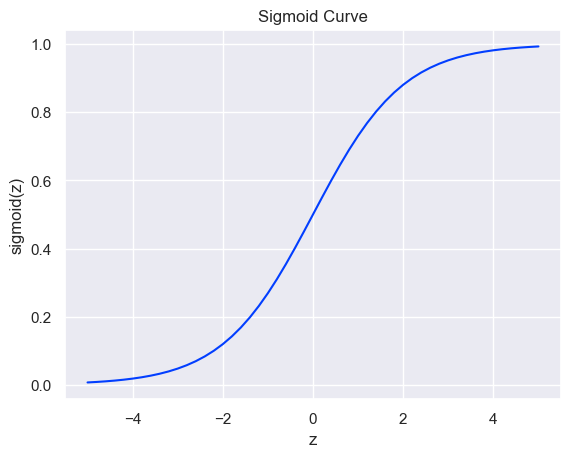

In [30]:
sns.set_theme(style="darkgrid", palette="bright")
sns.lineplot(x=z, y=sigmoid(z)).set(xlabel="z", ylabel="sigmoid(z)",
                                    title="Sigmoid Curve")

Implementing logistic regression

In [31]:
model = LogisticRegression()

model.fit(X_train, y_train)

c:\Users\Tynan\anaconda3\envs\ml-zoomcamp-2023\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
model.coef_[0].round(3)

array([ 0.476, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.082,
       -0.034, -0.073, -0.336,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.285, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.142,
       -0.249,  0.216, -0.121, -0.089,  0.102, -0.071, -0.089,  0.052,
        0.214, -0.089, -0.232, -0.07 ,  0.   ])

In [33]:
# Hard predictions (already have exact labels) (uncertain)
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [34]:
# Soft (probability) predictions
y_train_pred = model.predict_proba(X_train)[:, 1]
y_train_pred

array([0.09501457, 0.67956028, 0.63391004, ..., 0.53176751, 0.04266833,
       0.69914007])

In [35]:
y_train_pred >= 0.5

array([False,  True,  True, ...,  True, False,  True])

In [36]:
y_val_pred = model.predict_proba(X_val)[:, 1]
churn_decision = y_val_pred >= 0.5

In [37]:
# View clientel likely to churn
val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

Want to validate the accuracy of our predictions

In [38]:
# Predicted target vector
churn_decision.astype(int)

# Target vector
y_val;

In [39]:
(churn_decision == y_val).mean()

0.8034066713981547

In [40]:
# Checking the accuracy of our predictions
df_pred = pd.DataFrame()
df_pred['probability'] = y_val_pred
df_pred['prediction']  = churn_decision.astype(int)
df_pred['actual']      = y_val

df_pred['correct']     = (churn_decision == y_val)

df_pred

,probability,prediction,actual,correct
0,0.008987,0,0,True
1,0.204964,0,0,True
2,0.212706,0,0,True
3,0.543139,1,1,True
4,0.214209,0,0,True
...,...,...,...,...
1404,0.314503,0,0,True
1405,0.039363,0,1,False
1406,0.136379,0,0,True
1407,0.800044,1,1,True


### Model Interpretation

In [41]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [42]:
model.coef_[0].round(3)

array([ 0.476, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.082,
       -0.034, -0.073, -0.336,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.285, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.142,
       -0.249,  0.216, -0.121, -0.089,  0.102, -0.071, -0.089,  0.052,
        0.214, -0.089, -0.232, -0.07 ,  0.   ])

In [43]:
# Zip function
a = [1,2,3,4]
b = 'abcd'

list(zip(a,b))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

In [44]:
# Visualising the weightings for each feature
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.476,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.082,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.336,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.142,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.285,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

### Want to train a smaller model to better understand the features importance

In [45]:
small = ['contract', 'tenure', 'monthlycharges']

In [46]:
train_dicts_small = train[small].to_dict(orient='records')
val_dicts_small = val[small].to_dict(orient='records')

In [47]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dicts_small)

DictVectorizer(sparse=False)

In [48]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [49]:
X_train_small = dv_small.transform(train_dicts_small)

In [50]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [51]:
w0 = model_small.intercept_[0]
w0

-2.4767756620356254

In [52]:
w = model_small.coef_[0].round(3)
w

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [53]:
dict(zip(dv_small.get_feature_names_out(),w))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

Positive sum of weightings and bias == > 50% of churning (estimated that they will churn)

## Using the model

In [54]:
y_train_val = train_val.churn

del train_val['churn']
del train_val['customerid']

In [55]:
# Using the model
train_val_dicts = train_val[categorical_type + numeric_type].to_dict(orient="records")
test_dicts      = test[categorical_type + numeric_type].to_dict(orient="records")

dv_final = DictVectorizer(sparse=False)
dv_final.fit(train_val_dicts)

X_train_val = dv_final.transform(train_val_dicts)
X_test      = dv_final.transform(test_dicts)

model_final = LogisticRegression()
model_final.fit(X_train_val, y_train_val)

y_test_pred = model_final.predict_proba(X_test)[:, 1]

churn_decision_final = (y_test_pred >= 0.5).astype(int)

# Checking the accuracy of our predictions
df_final_pred = pd.DataFrame()
df_final_pred['probability'] = y_test_pred
df_final_pred['prediction']  = churn_decision_final.astype(int)
df_final_pred['actual']      = y_test

df_final_pred['correct']     = (churn_decision_final == y_test)

df_final_pred

,probability,prediction,actual,correct
0,0.062243,0,0,True
1,0.174739,0,0,True
2,0.370267,0,0,True
3,0.509361,1,1,True
4,0.233679,0,0,True
...,...,...,...,...
1404,0.483615,0,1,False
1405,0.060675,0,0,True
1406,0.006380,0,0,True
1407,0.165761,0,0,True


In [56]:
(churn_decision_final == y_test).mean()

0.815471965933286

If the accuracy difference between test and validation sets then model is probably overfitting somehow

In [57]:
# Testing the model on individual cases
customer = test_dicts[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

Receive a request about the customer with {... data ...} and want to output/return a probability (... %)

In [58]:
X_customer = dv_final.transform([customer])

In [59]:
model_final.predict_proba(X_customer)[:, 1]

array([0.4056811])

~40% chance of churning

In [60]:
# Actual result
y_test[10]

0

Decision not to send a promotional email was correct